<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/auto_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [3]:
gold_df=yf.download(tickers='GC=F',interval='1d')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
gold_df.to_csv('gold_df.csv')

In [5]:
from my_func_pkg import exp_change

In [6]:
closes=gold_df['Close'].values[:,0]

In [7]:
ret_g=exp_change(closes)

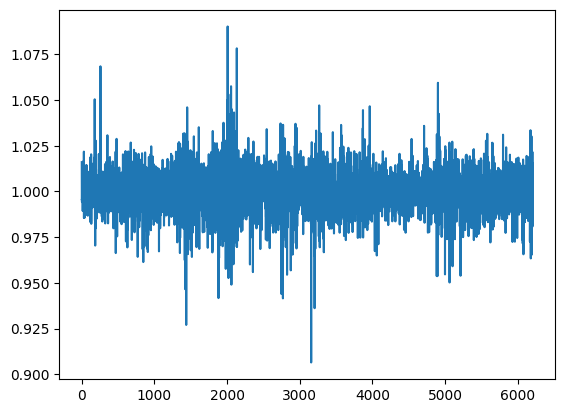

In [8]:
plt.plot(ret_g)

In [9]:
def build_data_for_auto_NN(inp_data,len_x:int,len_y:int):
  ln=len(inp_data)
  x=[]
  y=[]
  for i in range(ln):
    if i+len_x<ln and i+len_x+len_y<ln:
      x.append(inp_data[i:i+len_x])
      y.append(inp_data[i+len_x:i+len_x+len_y])
  return np.array(x),np.array(y)


In [10]:
x,y=build_data_for_auto_NN(ret_g,1000,30)

In [11]:
x.shape

(5178, 1000)

In [12]:
y.shape

(5178, 30)

In [13]:
x.reshape(x.shape[0],x.shape[1],1).shape

(5178, 1000, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

In [15]:
model = models.Sequential([
    layers.LSTM(100, input_shape=(1000,1)),
    layers.Dense(60),
    layers.Dense(30)  # خروجی با همان ابعاد ورودی
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
model.fit(x_train, y_train, epochs=16, batch_size=129)

Epoch 1/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.5278
Epoch 2/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0047
Epoch 3/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2.5252e-04
Epoch 4/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.3334e-04
Epoch 5/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.3181e-04
Epoch 6/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.2766e-04
Epoch 7/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.2851e-04
Epoch 8/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.2607e-04
Epoch 9/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.3026e-04
Epoch 10/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.2881e-04
Epoch 11/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.3136e-04
Epoch 12/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.2939e-04
Epoch 13/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.2953e-04
Epoch 14/16
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.2868e-04
Epoch 15/16
33/33 ━━━━━

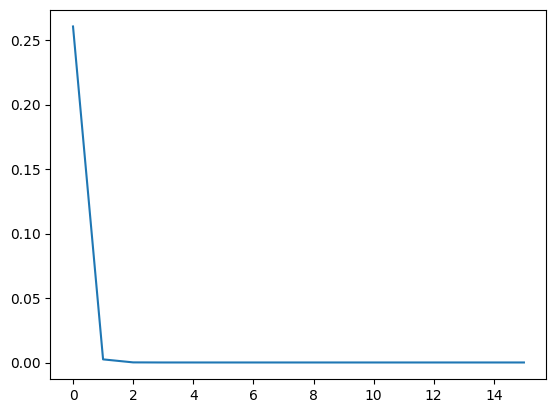

In [20]:
plt.plot(model.history.history['loss'])

In [21]:
model.save('my_gold_NN_model.keras')

In [22]:
model.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.2061e-04


0.00012049680663039908

In [23]:
y_predict=model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


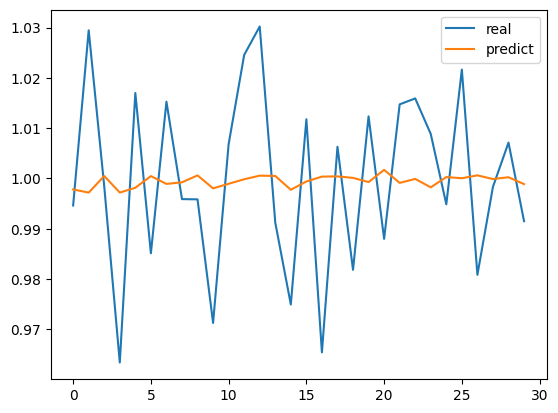

In [24]:
plt.plot(ret_g[-30:])
plt.plot(y_predict[-1])
plt.legend(['real','predict'])

In [25]:
np.mean(y_predict[-1])

np.float32(0.99946916)

In [26]:
y_p_all=model.predict(x)

162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [27]:
y_p_all.shape

(5178, 30)

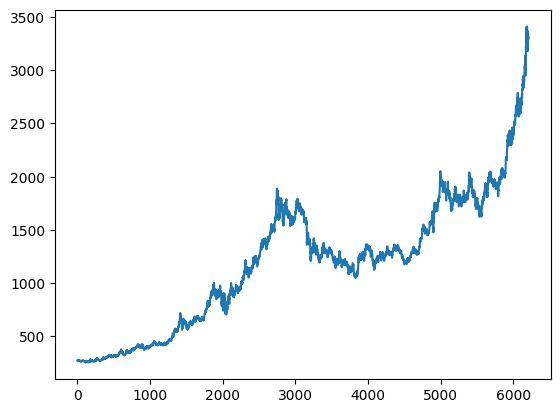

In [28]:
plt.plot(closes)

In [29]:
def build_cenarios_by_given_future_dt(future_dt:np.ndarray,n_cenarios:int,l_cenarios:int,base_dt:np.ndarray):
  cenarios=np.zeros((n_cenarios,l_cenarios))
  for i in range(n_cenarios):
    for j in range(l_cenarios):
      c=np.random.choice(future_dt)
      if j==0:
        cenarios[i,j]=base_dt[-1]*c
      else:
        cenarios[i,j]=cenarios[i,j-1]*c
  return cenarios.T

In [30]:
cenarios_end=build_cenarios_by_given_future_dt(y_predict[-1],n_cenarios=100,l_cenarios=30,base_dt=closes)

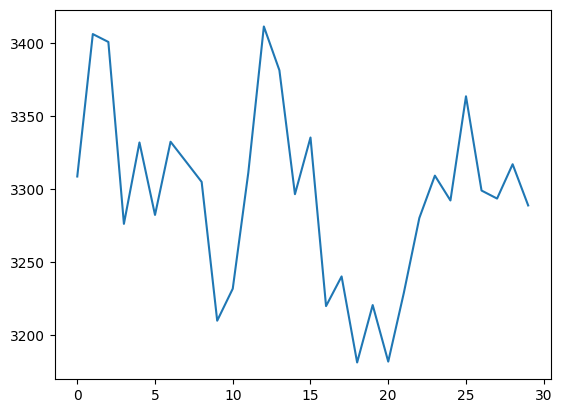

In [31]:
plt.plot(closes[-30:])

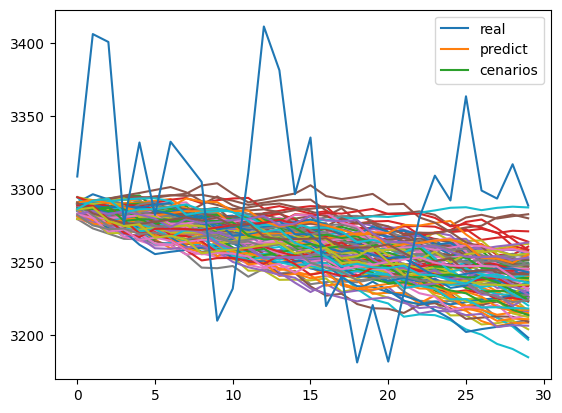

In [32]:
plt.plot(cenarios_end)
plt.plot(closes[-30:])
plt.legend(['real','predict','cenarios'])
plt.show()

In [33]:
def base_cenarios_by_given_future_dt(future_dt:np.ndarray,l_cenarios:int,base_dt:np.ndarray):
  b_cenarios=np.zeros((l_cenarios,))
  for j in range(l_cenarios):
      if j==0:
        b_cenarios[j]=base_dt[-1]*future_dt[0]
      else:
        b_cenarios[j]=b_cenarios[j-1]*future_dt[j]
  return b_cenarios

In [38]:
bc=base_cenarios_by_given_future_dt(y_predict[-1],l_cenarios=30,base_dt=closes)

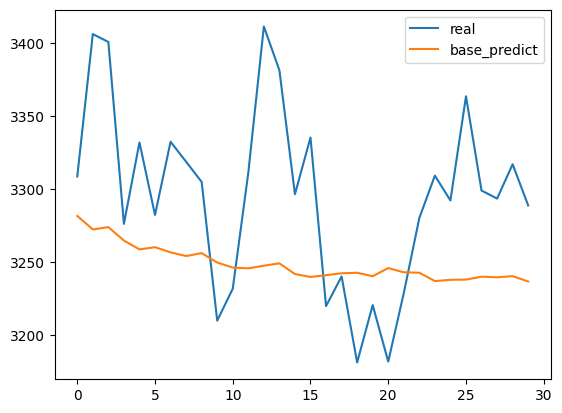

In [39]:
plt.plot(closes[-30:])
plt.plot(bc)
plt.legend(['real','base_predict'])
plt.show()

In [36]:
from my_func_pkg import most_frequency_cenarios

In [37]:
mfc=most_frequency_cenarios(closes[:-30],10,0.9,100,lcenarios=30)

100%|██████████| 100/100 [00:34<00:00,  2.94it/s]


In [40]:
mfc

array([3037.13591432, 3138.76328104, 3240.39064776, 3342.01801448,
       3443.6453812 , 3545.27274792])

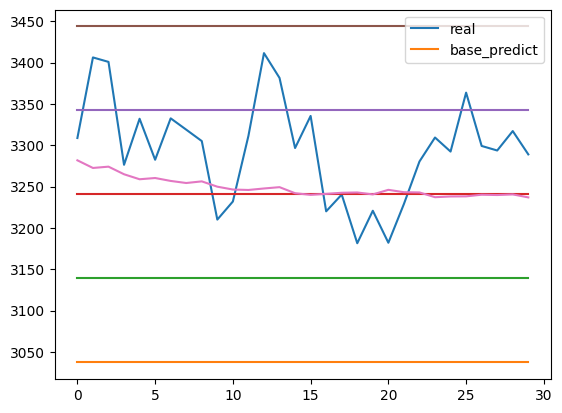

In [41]:
plt.plot(closes[-30:])
plt.plot([mfc[0]]*30)
plt.plot([mfc[1]]*30)
plt.plot([mfc[2]]*30)
plt.plot([mfc[3]]*30)
plt.plot([mfc[4]]*30)
plt.plot(bc)
plt.legend(['real','base_predict'])
plt.show()

In [42]:
bc_all=base_cenarios_by_given_future_dt(y_p_all[-1],l_cenarios=30,base_dt=closes)

In [43]:
mfc_all=most_frequency_cenarios(closes,10,0.9,100,lcenarios=30)

100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


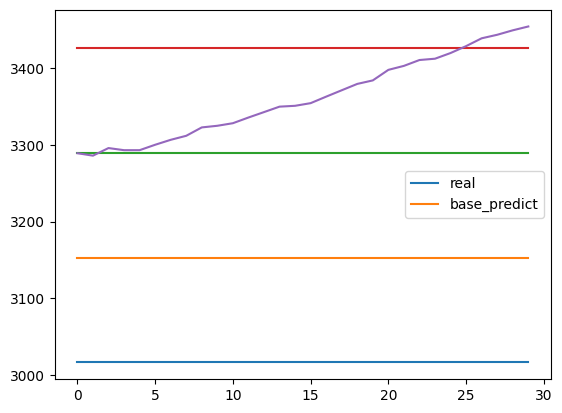

In [45]:
#plt.plot(closes[-30:])
plt.plot([mfc_all[0]]*30)
plt.plot([mfc_all[1]]*30)
plt.plot([mfc_all[2]]*30)
plt.plot([mfc_all[3]]*30)
#plt.plot([mfc_all[4]]*30)
plt.plot(bc_all)
plt.legend(['real','base_predict'])
plt.show()

In [46]:
mfc_all

array([3016.09852801, 3152.69562324, 3289.29271847, 3425.88981369])

In [47]:
bc_all

array([3289.13906347, 3285.94759864, 3295.85369138, 3293.09104051,
       3293.09457361, 3300.15136635, 3306.60484266, 3311.8663308 ,
       3322.80283054, 3324.93587731, 3328.28118309, 3335.70023639,
       3342.77516212, 3349.89099541, 3350.99316864, 3354.44818047,
       3362.95285776, 3371.27183449, 3379.55271448, 3384.13983873,
       3397.89084373, 3403.08533514, 3410.72874044, 3412.44211301,
       3419.85065991, 3428.87094262, 3439.06933668, 3443.67000894,
       3449.48211507, 3454.49353514])